In [44]:

#Import libraries  for data load and  reading
import numpy as np
import pandas as pd 

#import libraries for  visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [45]:

##############    STEP 1 : Read  Dataset   ################
print('############# STEP 1 : Read  Dataset    ')

df = pd.read_csv('Leads.csv')

# Details about the dataset
print("Shape of the dataset ",df.shape)  #  (9240, 37)
print("Check head the dataset ")
print(df.head(2))
print(df.info())

print(df.isnull().sum())

############# STEP 1 : Read  Dataset    
Shape of the dataset  (9240, 37)
Check head the dataset 
                            Prospect ID  Lead Number Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737         API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728         API   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   

  Get updates on DM Content Lead Profile    City Asymmetrique Activity Index  \
0                        No       Select  Select                   02.Medium   
1                        No       Select  Select                   02.Medium   

  Asymmetrique Profile Index Asymmetrique Activity Score  \
0

In [46]:

##############  STEP 2 : Data Cleaning   ####################

print('############# STEP 2 : Data Cleaning   ########  ')

# check the precentage of the null values in columns 
#print(len(df.index))
#print(df.shape[0])

print("Percentage of null values ")
print(round((df.isnull().sum()*100)/len(df.index),2))


############# STEP 2 : Data Cleaning   ########  
Percentage of null values 
Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                     

In [47]:

# Drop all columns with more than 45 percent of null values

cols  = []
cols  =  df.columns[(round((df.isnull().sum()*100)/len(df.index),2))>45]
print("Columns to drop ", cols)

df  =df.drop(cols  , axis=1)

#check the percentage of nulls in remaining columns
print(round((df.isnull().sum()*100)/len(df.index),2))

print("New Shape of the dataset ", df.shape)  # 7 columns were dropped ,  (9240, 32)

Columns to drop  Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')
Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation

In [49]:
# Still we have  multiple columns with high  null values  

#  Handel city column

print(df.City.value_counts(dropna=False))  
#Mumbai has highest leads  and 2249 didn't selected the city  , changing the unselected city toi mumbai

df['City'] = df['City'].replace('Select', 'Mumbai')
df['City'] = df['City'].replace(np.nan,'Mumbai')

# Handel country column
print(df.Country.value_counts(dropna=False))
#India has very high value as compare to other countries hence country will not have major impact on values (showing huge data imbalance )we can drop the  country 
df = df.drop('Country' , axis=1)


City
Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64


AttributeError: 'DataFrame' object has no attribute 'Country'

In [50]:
# Handel Specialization column
print(df.Specialization.value_counts(dropna=False))  # Values are distributed , Fill NaN with 'Not Provided'

df['Specialization'] = df['Specialization'].replace(np.nan,'Not Provided')


#Check values for  "How did you hear about X Education"
print(df['How did you hear about X Education'].value_counts(dropna=False))  
# Huge value  belongs to Select or NaN , hence  we can drop this column
df = df.drop('How did you hear about X Education', axis=1)


Specialization
Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64
How did you hear about X Education
Select                   5043
NaN                      2207
Online Search           

In [51]:

# check values for  "What matters most to you in choosing a course"
print(df['What matters most to you in choosing a course'].value_counts(dropna=False)) 
 # Huge value  belongs to 'Better Career Prospects' or NaN , hence  we can drop this column
df = df.drop('What matters most to you in choosing a course', axis=1)

# check values for "What is your current occupation"
print(df['What is your current occupation'].value_counts(dropna=False)) 
# Huge value  belongs to 'Unemployed' or NaN , Replacing NaN with 'Not provided'
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan,'Not Provided')


What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64
What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64


In [12]:

#check values for 'Lead Profile' column
print(df['Lead Profile'].value_counts(dropna=False))
# Huge value  belongs to 'Unemployed' or NaN , Replacing NaN with 'Not provided'
df['Lead Profile'] = df['Lead Profile'].replace(np.nan,'Not Provided')

#check values for  Tags Columns
print(df['Tags'].value_counts(dropna=False))
# Huge value  belongs to  NaN , Replacing NaN with 'Not provided'
df['Tags'] = df['Tags'].replace(np.nan,'Not Provided')


Lead Profile
Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64
Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid 

In [52]:

# We can assign maximum frequency values for  the rows which has less number of missing values

cols = df.columns[round((df.isnull().sum()*100)/len(df.index),2)>0]
print(cols)

#print( df['Lead Source'].value_counts(dropna=False))
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Google')
#print( df['TotalVisits'].value_counts(dropna=False))
df['TotalVisits'] = df['TotalVisits'].replace(np.nan,'0.0')
#print( df['Page Views Per Visit'].value_counts(dropna=False))
df['Page Views Per Visit'] = df['Page Views Per Visit'].replace(np.nan,'0.00')

print( df['Last Activity'].value_counts(dropna=False))
df['Last Activity'] = df['Last Activity'].replace(np.nan,'Not Provided')


Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Tags', 'Lead Profile'],
      dtype='object')
Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: count, dtype: int64


In [13]:

# check again the null values 
print(round((df.isnull().sum()*100)/len(df.index),2))
print(df.shape)   # (9240, 29)



Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                               0.00
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


In [53]:

# Copy  DataFrame to Leads dataframe  

Leads = df 
print(Leads.shape) # (9240, 29)

#############  STEP 3 : Exploratory Data Analysis      #######################

print('############# STEP 3 : Exploratory Data Analysis     ########  ')

print(Leads.info())
# 'Prospect ID' and 'Lead Number' are just numerical identity variables , hence can be dropped
Leads = Leads.drop('Prospect ID' , axis=1)
Leads = Leads.drop('Lead Number' , axis=1)
print(Leads.shape)  #  (9240, 27)



(9240, 29)
############# STEP 3 : Exploratory Data Analysis     ########  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Prospect ID                               9240 non-null   object
 1   Lead Number                               9240 non-null   int64 
 2   Lead Origin                               9240 non-null   object
 3   Lead Source                               9240 non-null   object
 4   Do Not Email                              9240 non-null   object
 5   Do Not Call                               9240 non-null   object
 6   Converted                                 9240 non-null   int64 
 7   TotalVisits                               9240 non-null   object
 8   Total Time Spent on Website               9240 non-null   int64 
 9   Page Views Per Visit                      9

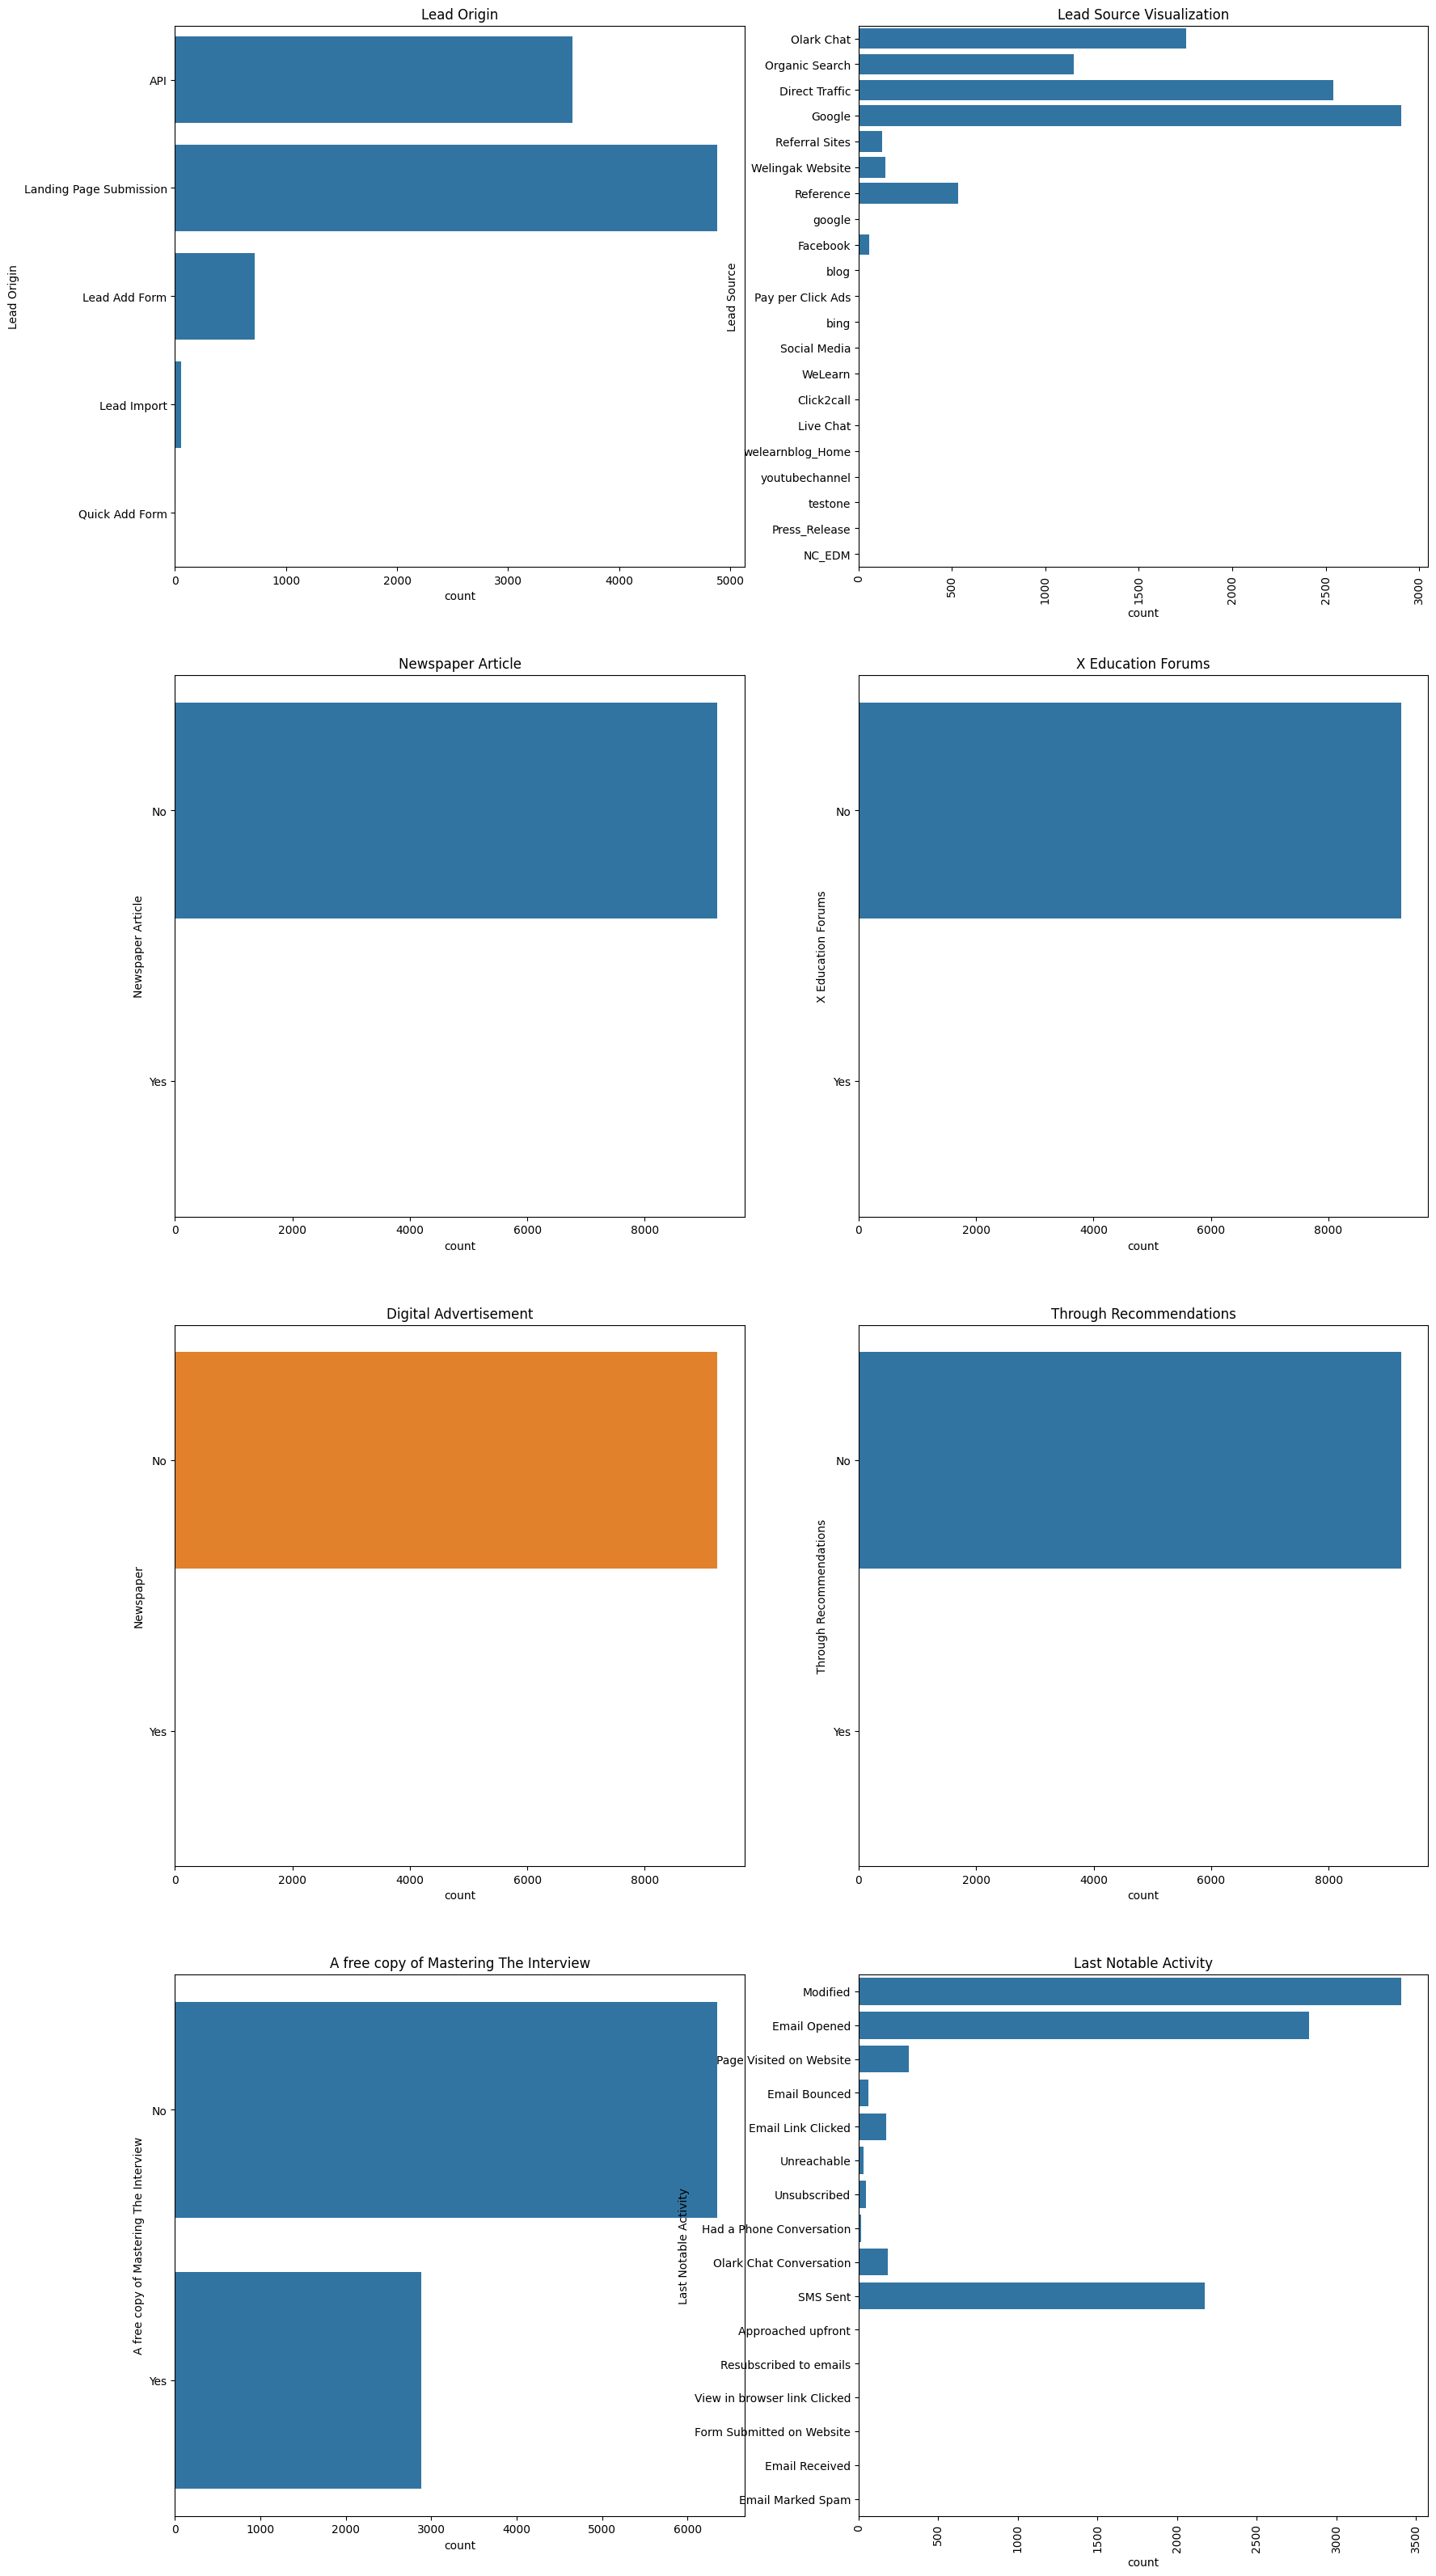

In [54]:

###############  STEP 3.1 : Univariate Analysis     #######################

# Categorical Variables
plt.figure(figsize = (20,40))

plt.subplot(4,2,1)
sns.countplot(Leads['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(4,2,2)
sns.countplot(Leads['Lead Source']).tick_params(axis='x', rotation =90 )
plt.title("Lead Source Visualization")

plt.subplot(4,2,3)
sns.countplot(Leads['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(4,2,4)
sns.countplot(Leads['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(4,2,5)
sns.countplot(Leads['Newspaper'])
plt.title('Newspaper')

plt.subplot(4,2,5)
sns.countplot(Leads['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(4,2,6)
sns.countplot(Leads['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(4,2,7)
sns.countplot(Leads['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(4,2,8)
sns.countplot(Leads['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()



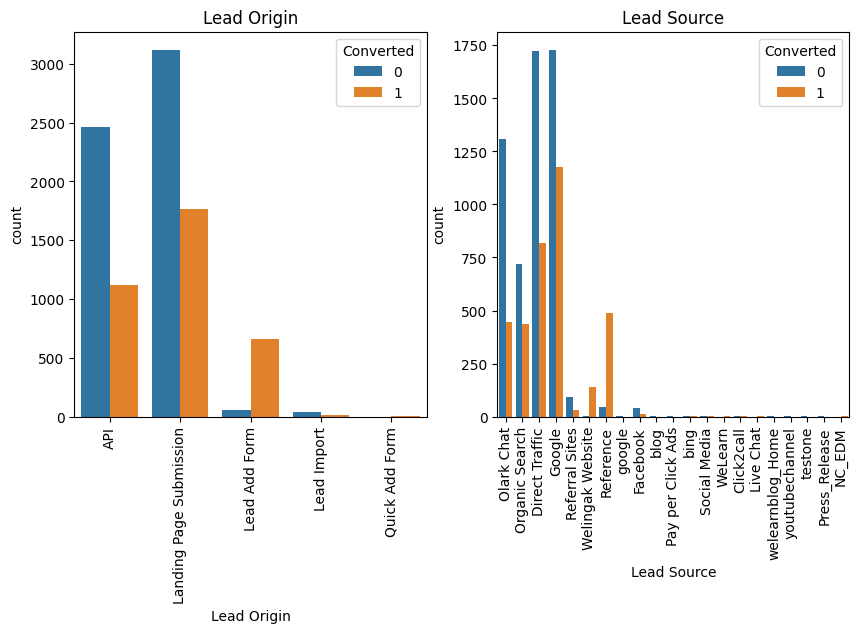

In [55]:

# categorical variables and Converted graph
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= Leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= Leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()  


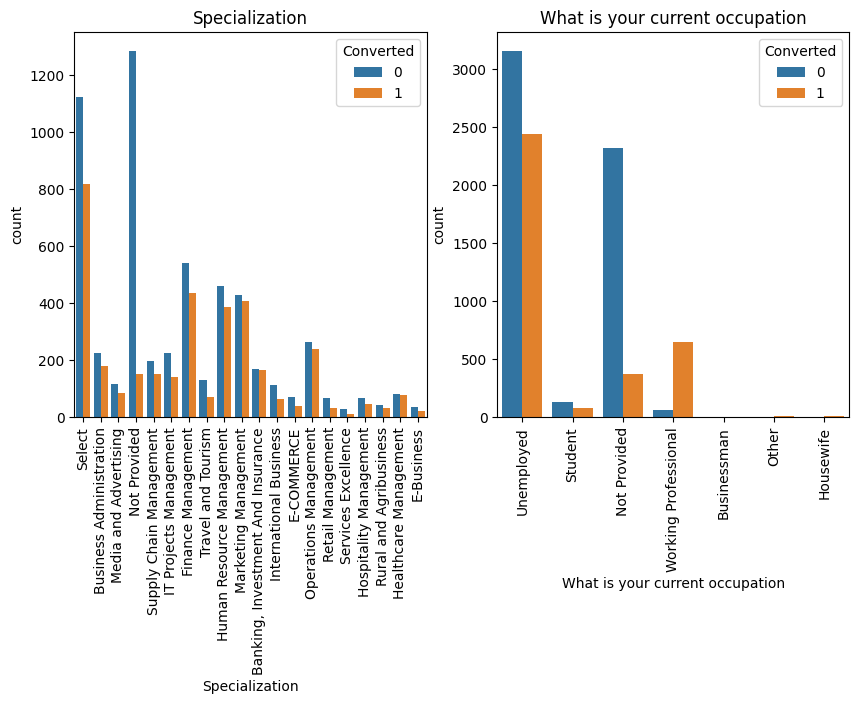

In [56]:

# Specialization and current occupation with converted
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= Leads).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= Leads).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()


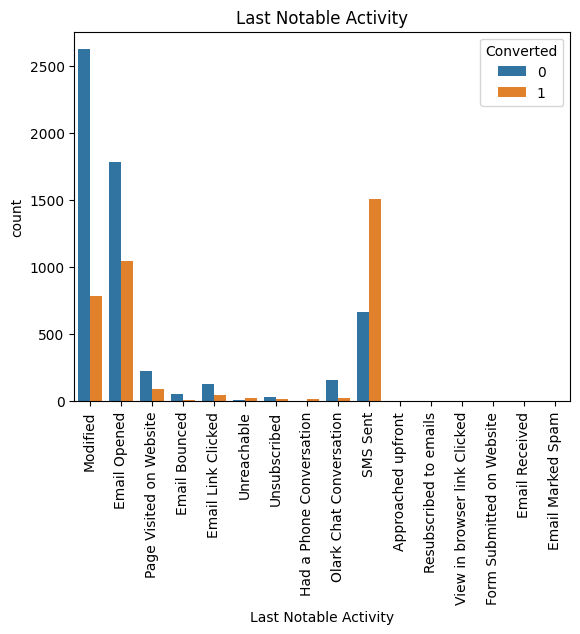

In [57]:

#Last activity and Converted
sns.countplot(x='Last Notable Activity', hue='Converted', data= Leads).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()



In [58]:

## Numerical variables , First convert them to numeric if needed

Leads['TotalVisits'] = pd.to_numeric(Leads['TotalVisits'], errors='coerce')
Leads['Page Views Per Visit'] = pd.to_numeric(Leads['Page Views Per Visit'], errors='coerce')

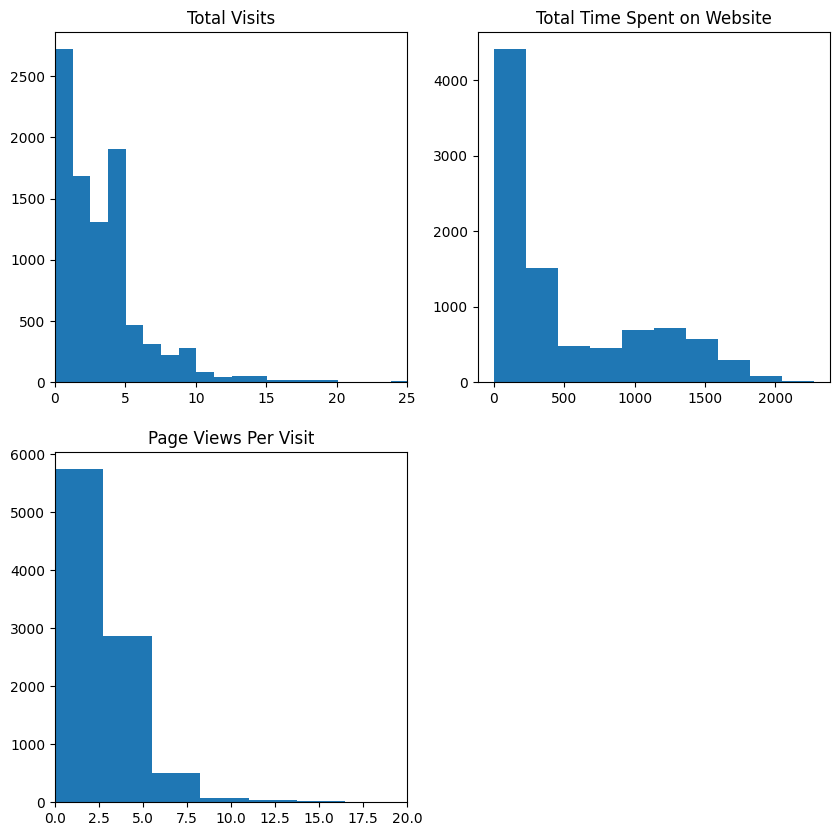

In [59]:

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(Leads['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(2,2,2)
plt.hist(Leads['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.hist(Leads['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()



In [60]:

################ STEP 4 : Dummy Variables ##################

print('############# STEP 4 : Dummy Variables    ########  ')

# Get all categorical variables 
cat_cols  = Leads.select_dtypes(include='object').columns
print(cat_cols)

# Create dummy variables  from get_dummies() method

dummy  = pd.get_dummies(Leads[cat_cols], drop_first=True)
dummy = dummy.astype(int)
Leads_Final  = pd.concat([Leads, dummy], axis=1)
#print(Leads_Final.head(2)) 



############# STEP 4 : Dummy Variables    ########  
Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [61]:

Leads_Final = Leads_Final.drop(cat_cols ,axis=1)
print(Leads_Final.shape)  # (9240, 131)

(9240, 129)


In [62]:

######################  STEP 5 : TRAIN - TEST SPLIT ######################

print('#############  STEP 5 : TRAIN - TEST SPLIT    ########  ')

# import test train split library from scikit lean package 
from sklearn.model_selection import train_test_split


Leads_Final = Leads_Final.apply(pd.to_numeric, errors='coerce')

#############  STEP 5 : TRAIN - TEST SPLIT    ########  


In [63]:

# Optionally, fill NaN values with a specific value (e.g., 0) or drop them
Leads_Final = Leads_Final.fillna(0)  # or Leads.dropna()

X = Leads_Final.drop('Converted' , axis=1)
y = Leads_Final['Converted']
print(X.head(2))
print(y.head())


   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  ...  \
0                           0                     0                   0  ...   
1                           0                     0                   0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   

   La

In [66]:

# split the data into training and test data by 70 and 30 percent respectively 
X_train , X_test , y_train , y_test = train_test_split(X,y, train_size=0.7 , random_state=42)
print('Training data set shape = ', X_train.shape)
print('Test dataset  shape =  ',X_test.shape)


Training data set shape =  (6468, 128)
Test dataset  shape =   (2772, 128)


In [67]:

# Rescaling numeric variables using MinMaxScaler

#Import MinMaxSclaer 
from sklearn.preprocessing import MinMaxScaler

#scale the numeric features
Scaler  = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = Scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] )
print(X_train.head())


      TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4715     0.000000                     0.000000              0.000000   
7132     0.007968                     0.549296              0.018182   
8954     0.015936                     0.170335              0.024182   
5283     0.294821                     0.532130              0.224182   
3003     0.011952                     0.595951              0.054545   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4715                                    0                          0   
7132                                    0                          0   
8954                                    1                          0   
5283                                    1                          0   
3003                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
4715                        0                           0   
7132        

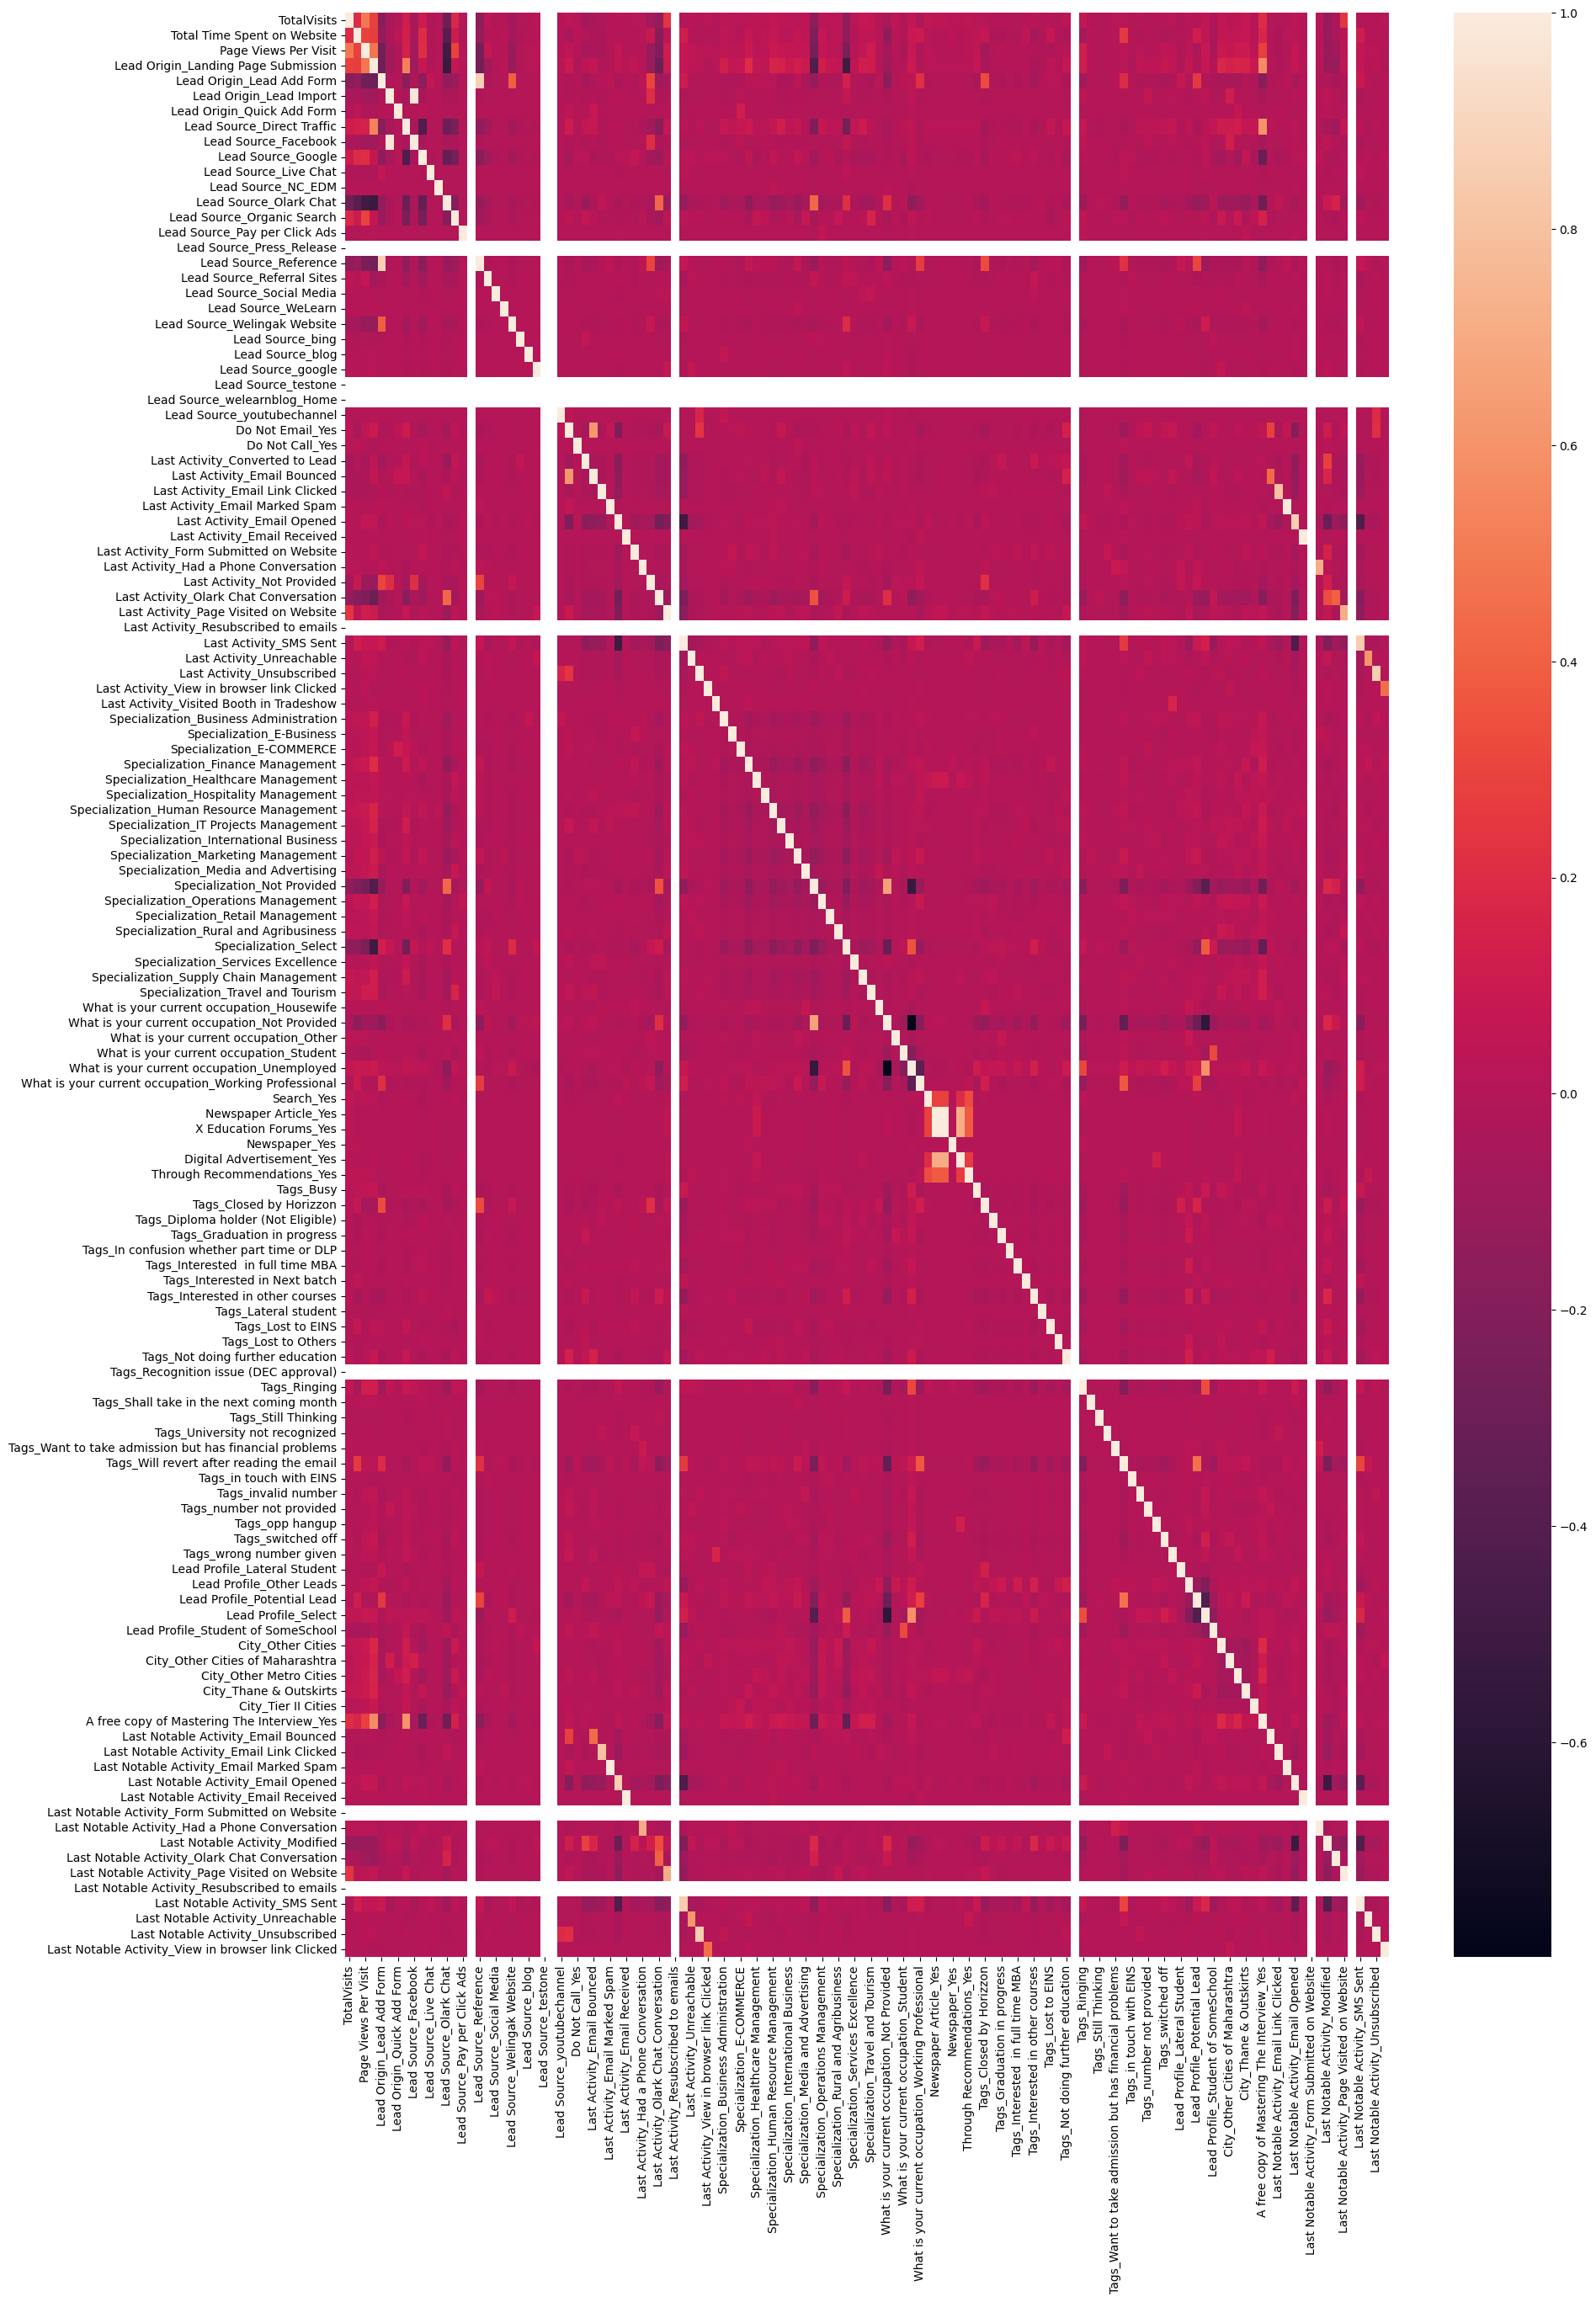

In [68]:

# To check the correlation among varibles in training dataset
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()


In [70]:

# Since  features are high in numbers hence we will analyze and  drop irrelevant features later

####################  STEP 6  : MODEL BUILDING - LOGISTIC REGRESSION #################

print('#############   STEP 6  : MODEL BUILDING - LOGISTIC REGRESSION    ########  ')

#Import Logistic Regression
from sklearn.linear_model import  LogisticRegression
log_reg  = LogisticRegression()


#############   STEP 6  : MODEL BUILDING - LOGISTIC REGRESSION    ########  


In [72]:

# Feature selection through RFE 
from sklearn.feature_selection import  RFE

print(X_train.info())



<class 'pandas.core.frame.DataFrame'>
Index: 6468 entries, 4715 to 7270
Columns: 128 entries, TotalVisits to Last Notable Activity_View in browser link Clicked
dtypes: float64(3), int64(125)
memory usage: 6.4 MB
None


In [74]:

# Running feature sleection for 15 top relevant  features 
rfe  = RFE(estimator=log_reg , n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

# get features column slected  by RFE
rfe_cols  = X_train.columns[rfe.support_]
print(rfe_cols)


Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Profile_Student of SomeSchool'],
      dtype='object')


In [75]:

# Progressing  with columns selected  by RFE 

# Import statsmodel
import statsmodels.api as sm

# Model -1 
X_train_sm = sm.add_constant( X_train[rfe_cols])
logm1 = sm.GLM(y_train, X_train_sm,family=sm.families.Binomial())
res1  = logm1.fit()
print(res1.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1446.9
Date:                Thu, 27 Mar 2025   Deviance:                       2893.7
Time:                        22:24:03   Pearson chi2:                 7.40e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5871
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [76]:

# Evaluate P-Value and  VIFs for feature varaibles

#P-Value of "Lead Source_Welingak Website" feature variable is too high hence dropping it  
#dropping column with high p-value

rfe_cols = rfe_cols.drop('Lead Source_Welingak Website')

In [77]:

# Model -2 
X_train_sm2 = sm.add_constant( X_train[rfe_cols])
logm2 = sm.GLM(y_train, X_train_sm2,family=sm.families.Binomial())
res2  = logm2.fit()
print(res2.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1533.2
Date:                Thu, 27 Mar 2025   Deviance:                       3066.3
Time:                        22:24:14   Pearson chi2:                 7.46e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5760
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [ ]:

# Feature Variable  "Tags_switched off " has very high p-value hence dropping it 

rfe_cols = rfe_cols.drop('Tags_switched off')
print(rfe_cols)


In [78]:

# Model -3 
X_train_sm3 = sm.add_constant( X_train[rfe_cols])
logm3 = sm.GLM(y_train, X_train_sm3,family=sm.families.Binomial())
res3  = logm3.fit()
print(res3.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1533.2
Date:                Thu, 27 Mar 2025   Deviance:                       3066.3
Time:                        22:25:45   Pearson chi2:                 7.46e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5760
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [79]:

# Feature Variable  "Tags_Ringing" has very high p-value hence dropping it 

rfe_cols = rfe_cols.drop('Tags_Ringing')
print(rfe_cols)


Index(['Total Time Spent on Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Profile_Student of SomeSchool'],
      dtype='object')


In [80]:

# Model -4 
X_train_sm4 = sm.add_constant( X_train[rfe_cols])
logm4 = sm.GLM(y_train, X_train_sm4,family=sm.families.Binomial())
res4  = logm4.fit()
print(res4.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1699.3
Date:                Thu, 27 Mar 2025   Deviance:                       3398.7
Time:                        22:25:55   Pearson chi2:                 6.41e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5536
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [81]:

# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train_sm4.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm4.values, i) for i in range(X_train_sm4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)


                                    Features   VIF
0                                      const  2.64
8   Tags_Will revert after reading the email  1.21
2                     Last Activity_SMS Sent  1.11
1                Total Time Spent on Website  1.10
5           Tags_Interested in other courses  1.05
3                    Tags_Closed by Horizzon  1.05
13        Lead Profile_Student of SomeSchool  1.03
11                         Tags_switched off  1.02
6                          Tags_Lost to EINS  1.02
4         Tags_Diploma holder (Not Eligible)  1.01
9                        Tags_invalid number  1.01
7           Tags_Not doing further education  1.01
12                   Tags_wrong number given  1.01
10                  Tags_number not provided  1.00


In [82]:

# feature variable  'Tags_Diploma holder (Not Eligible)' has low VIF but high P-value hence dropping it now 

rfe_cols = rfe_cols.drop('Tags_Diploma holder (Not Eligible)')



In [83]:

# Model -5 
X_train_sm5 = sm.add_constant( X_train[rfe_cols])
logm5 = sm.GLM(y_train, X_train_sm5,family=sm.families.Binomial())
res5  = logm5.fit()
print(res5.summary())
# Make a VIF dataframe for all the variables now
vif = pd.DataFrame()
vif['Features'] = X_train_sm5.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm5.values, i) for i in range(X_train_sm5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1704.7
Date:                Thu, 27 Mar 2025   Deviance:                       3409.4
Time:                        22:28:35   Pearson chi2:                 6.46e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5529
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [85]:

# feature variable  'Tags_number not provided ' has low VIF but high P-value hence dropping it now 

rfe_cols = rfe_cols.drop('Tags_number not provided')

# Model -6 
X_train_sm6 = sm.add_constant( X_train[rfe_cols])
logm6 = sm.GLM(y_train, X_train_sm6,family=sm.families.Binomial())
res6  = logm6.fit()
print(res6.summary())
# Make a VIF dataframe for all the variables now
vif = pd.DataFrame()
vif['Features'] = X_train_sm6.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm6.values, i) for i in range(X_train_sm6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1710.7
Date:                Thu, 27 Mar 2025   Deviance:                       3421.3
Time:                        22:31:01   Pearson chi2:                 6.47e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5520
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [86]:
print("# Now P-value and VIF both are as per expectation, hence we can fix this model")

# Now P-value and VIF both are as per expectation, hence we can fix this model


In [87]:

print('#############   STEP 7 : CREATING PREDICTION    ########  ')

#predicting the probablities on the training dataset
y_train_pred = res6.predict(X_train_sm6)
print(y_train_pred.head())

# Reshaping to an Array
y_train_pred = y_train_pred.values.reshape(-1)
#print(y_train_pred.head())

# creating dataframe with given conversion and  probablities of conversion
y_train_pred_final = pd.DataFrame({'Converted' :y_train.values,'Conversion_Prob':y_train_pred})
#print(y_train_pred_final.head())


#############   STEP 7 : CREATING PREDICTION    ########  
4715    0.057482
7132    0.976498
8954    0.372715
5283    0.018615
3003    0.666793
dtype: float64


In [88]:

# Create a predicted column using Conversion_Prob column using a cut off of 0.5 
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if  x> 0.5 else 0)
print("Final Prediction table  ")
print(y_train_pred_final.head())


Final Prediction table  
   Converted  Conversion_Prob  Predicted
0          0         0.057482          0
1          1         0.976498          1
2          0         0.372715          0
3          0         0.018615          0
4          0         0.666793          1


In [89]:

################## STEP 8  : MODEL EVALUATION ####################

print('#############   STEP 8  : MODEL EVALUATION   ########  ')

# import metrics libraries 
from sklearn import metrics

# Confusion Matrix
confusion  = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

# Accuracy score
print('Accuracy Score')
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]


#############   STEP 8  : MODEL EVALUATION   ########  
[[3820  164]
 [ 510 1974]]
Accuracy Score
0.8957946815089672


In [90]:

# Calculating the sensitivity
print('Sensitivity')
print(TP/(TP+FN))

# Calculating the specificity
print('Specificity')
print(TN/(TN+FP))




Sensitivity
0.7946859903381642
Specificity
0.9588353413654619


In [91]:

######################  STEP 9 : ROC Curve ############

print('#############   STEP 9  : ROC CURVE   ########  ')

# Calculate FPT , TPR and Threshold
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

print('fpr- ',fpr  ,'tpr  - ',tpr , 'thresholds - ',thresholds)



#############   STEP 9  : ROC CURVE   ########  
fpr-  [0.         0.         0.         ... 0.99899598 0.99924699 1.        ] tpr  -  [0.00000000e+00 4.02576490e-04 8.05152979e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00] thresholds -  [           inf 9.99609885e-01 9.99253771e-01 ... 1.09968742e-11
 1.09280443e-11 1.05637393e-11]


In [92]:

# ROC Function 
def draw_roc( actual, probs ):
    fpr , tpr,  thresholds  = metrics.roc_curve(actual , probs , drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


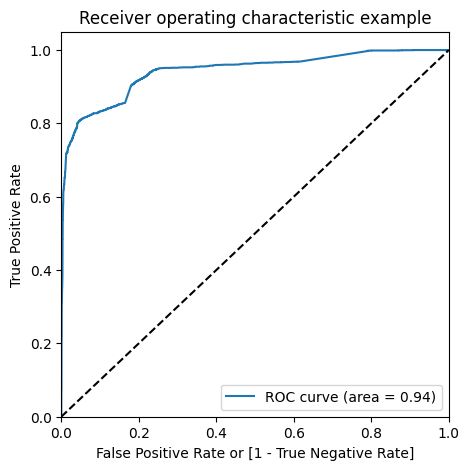

In [93]:

# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)



In [94]:

#### Finding Optimal Cutoff Point for balanced  sensitivity and specificity

# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)

print(y_train_pred_final.head())



   Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.057482          0    1    0    0    0    0    0    0   
1          1         0.976498          1    1    1    1    1    1    1    1   
2          0         0.372715          0    1    1    1    1    0    0    0   
3          0         0.018615          0    1    0    0    0    0    0    0   
4          0         0.666793          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    1    1    1  
2    0    0    0  
3    0    0    0  
4    0    0    0  


In [95]:

# Now calculate  accuracy , sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


In [96]:

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]


print("Cut off  data frame is as below ")

print( cutoff_df)


Cut off  data frame is as below 
     prob  accuracy     sensi     speci
0.0   0.0  0.384045  1.000000  0.000000
0.1   0.1  0.813698  0.951288  0.727912
0.2   0.2  0.840754  0.923510  0.789157
0.3   0.3  0.865182  0.840177  0.880773
0.4   0.4  0.895795  0.809581  0.949548
0.5   0.5  0.895795  0.794686  0.958835
0.6   0.6  0.891466  0.768519  0.968122
0.7   0.7  0.887446  0.737118  0.981175
0.8   0.8  0.883271  0.718196  0.986195
0.9   0.9  0.866419  0.668680  0.989709


<Figure size 1000x600 with 0 Axes>

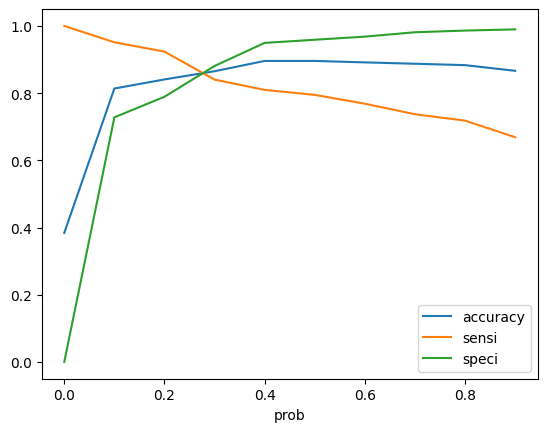

In [97]:

#Plot accuracy, sensitivity and specificity for various probabilities.
plt.figure(figsize=(10,6))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()



In [98]:

#From the curve above, 0.35 is the optimum point to take it as a cutoff probability for accuracy, sensitivity and specificity 

# Recreate  predicted column with 0.3 as cutoff

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if  x> 0.35 else 0)
print("Final Prediction table after putting cut off as 0.35 ")
print(y_train_pred_final.head())


Final Prediction table after putting cut off as 0.35 
   Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.057482          0    1    0    0    0    0    0    0   
1          1         0.976498          1    1    1    1    1    1    1    1   
2          0         0.372715          1    1    1    1    1    0    0    0   
3          0         0.018615          0    1    0    0    0    0    0    0   
4          0         0.666793          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    1    1    1  
2    0    0    0  
3    0    0    0  
4    0    0    0  


In [99]:

# Check the overall accuracy
print('New accuracy score with 0.35 as cut off  is  = ',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

# Creating confusion matrix 
confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion_2)


New accuracy score with 0.35 as cut off  is  =  0.885899814471243
[[3687  297]
 [ 441 2043]]


In [100]:


TP = confusion_2[1,1] # true positive # Which are actually converted and we have predicted them as converted
TN = confusion_2[0,0] # true negatives # Which are actually not converted and we have predicted them as not converted
FP = confusion_2[0,1] # false positives # Which are actually not converted but we have predicted them as converted
FN = confusion_2[1,0] # false negatives # Which are actually converted but we have predicted them as not converted

accurcay2 = (TP + TN) / (TP + TN + FP + FN)
sensitivity2 = TP / (TP + FN)
specificity2 = TN / (TN + FP)
fpr = FP / (TN + FP)
tpr = TP / (TP + FN)
ppv = TP / (TP + FP)
npv = TN / (TN + FN)

print('Accuracy - ',accurcay2)
print('Sensitivity - ',sensitivity2)
print('Specificity - ',specificity2)
print('False Positive Rate - ',fpr)
print('True Positive Rate - ',tpr)
print('Positive Predictive Value - ',ppv)
print('Negative Predictive Value - ',npv)


Accuracy -  0.885899814471243
Sensitivity -  0.822463768115942
Specificity -  0.9254518072289156
False Positive Rate -  0.07454819277108433
True Positive Rate -  0.822463768115942
Positive Predictive Value -  0.8730769230769231
Negative Predictive Value -  0.8931686046511628


In [101]:

## With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.

##################  STEP 10 : Prediction on Test Dataset ###############

print('#############   STEP 10  :  Prediction on Test Dataset   ########  ')

# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = Scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

# Substituting all the columns in the final train model
col = X_train.columns

# Select the columns in X_train for X_test as well
X_test = X_test[rfe_cols]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res6.predict(X_test_sm)

# Coverting y_test_pred to dataframe
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)



#############   STEP 10  :  Prediction on Test Dataset   ########  


In [102]:

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
print(y_pred_final.head())

# Prediction with cut off 0.35 as calculated from training dataset
y_pred_final['Predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
print(' y_pred_final head')
print(y_pred_final.head())


   Converted  Conversion_Prob
0          1         0.989065
1          0         0.163763
2          0         0.057619
3          0         0.083825
4          0         0.072785
 y_pred_final head
   Converted  Conversion_Prob  Predicted
0          1         0.989065          1
1          0         0.163763          0
2          0         0.057619          0
3          0         0.083825          0
4          0         0.072785          0


In [103]:

# Check the overall accuracy for test data
print('Accuracy for test data  ' ,metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.Predicted))

#  confusion matrix  for test data
confusion_test = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.Predicted )
print(confusion_test)

# true positive
TP = confusion_test[1,1]
#  true negatives
TN = confusion_test[0,0]
#  false positives
FP = confusion_test[0,1] 
#  false negatives
FN = confusion_test[1,0]

accurcay_test = (TP + TN) / (TP + TN + FP + FN)
sensitivity_test = TP / (TP + FN)
specificity_test = TN / (TN + FP)
fpr = FP / (TN + FP)
tpr = TP / (TP + FN)

print(' Test Accuracy - ',accurcay_test)
print('Test Sensitivity - ',sensitivity_test)
print('Test Specificity - ',specificity_test)
print('Test data False Positive Rate - ',fpr)
print('Test data True Positive Rate - ',tpr)


Accuracy for test data   0.8798701298701299
[[1569  126]
 [ 207  870]]
 Test Accuracy -  0.8798701298701299
Test Sensitivity -  0.807799442896936
Test Specificity -  0.9256637168141593
Test data False Positive Rate -  0.0743362831858407
Test data True Positive Rate -  0.807799442896936


#############   STEP 11  :  Precision Recall    ########  
precision_score =  0.8730769230769231
recall_score =  0.822463768115942


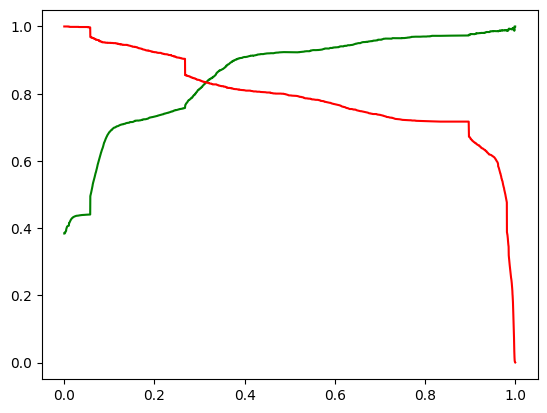

In [104]:

############## STEP 11  : Precision Recall  ################


print('#############   STEP 11  :  Precision Recall    ########  ')

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('precision_score = ' ,precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)  )
print('recall_score = ',recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)  )

# plot a precision-recall curve

from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


In [112]:

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
print(y_train_pred_final.head())

# Accuracy
print('New accuracy score = ',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

# Creating confusion matrix again
confusion_new = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion_new)

# ] true positive
TP = confusion_new[1,1]
#  true negatives
TN = confusion_new[0,0]
#  false positives
FP = confusion_new[0,1] 
# false negatives
FN = confusion_new[1,0]

print(' Precision = ', TP /( TP + FP))
print('Recall = ',TP / (TP + FN))


   Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.057482          0    1    0    0    0    0    0    0   
1          1         0.976498          1    1    1    1    1    1    1    1   
2          0         0.372715          1    1    1    1    1    0    0    0   
3          0         0.018615          0    1    0    0    0    0    0    0   
4          0         0.666793          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    1    1    1                1  
2    0    0    0                1  
3    0    0    0                0  
4    0    0    0                1  
New accuracy score =  0.885899814471243
[[3687  297]
 [ 441 2043]]
 Precision =  0.8730769230769231
Recall =  0.822463768115942


In [113]:

print("#################      STEP 10  : Prediction on Test Data set ###########")

# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res6.predict(X_test_sm)

# Coverting it to dataframe
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)



#################      STEP 10  : Prediction on Test Data set ###########


In [116]:

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
print(y_pred_final.head())

# Making prediction using cut off 0.4
y_pred_final['Predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
print(y_pred_final)


   Converted  Conversion_Prob
0          1         0.989065
1          0         0.163763
2          0         0.057619
3          0         0.083825
4          0         0.072785
      Converted  Conversion_Prob  Predicted
0             1     9.890652e-01          1
1             0     1.637629e-01          0
2             0     5.761856e-02          0
3             0     8.382530e-02          0
4             0     7.278519e-02          0
...         ...              ...        ...
2767          0     1.056374e-11          0
2768          0     8.079041e-02          0
2769          0     4.054990e-03          0
2770          0     1.195952e-02          0
2771          0     4.444640e-03          0

[2772 rows x 3 columns]


In [117]:

# Check the overall accuracy
print('Overall Accuracy  score = ',metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.Predicted))

# Creating confusion matrix 
confusion_final = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.Predicted )
print(confusion_final)

#  true positive
TP = confusion_final[1,1]
#  true negatives
TN = confusion_final[0,0]
#  false positives
FP = confusion_final[0,1] 
#  false negatives
FN = confusion_final[1,0]

print('Overall Precision = ', TP / (TP + FP))
print('Ovaerall Recall = ', TP / (TP + FN))



Overall Accuracy  score =  0.8524531024531025
[[1480  215]
 [ 194  883]]
Overall Precision =  0.8041894353369763
Ovaerall Recall =  0.819870009285051


In [119]:
print("With the current cut off as 0.3 we have Accuracy around 85% , Precision  is 80%  and Recall around 81%")


With the current cut off as 0.3 we have Accuracy around 85% , Precision  is 80%  and Recall around 81%
